# 期中练习

## 要求

检验对上半学期知识的掌握，课后自行完成，可查阅各种资料。

### 如何提交

- 复制本文件，文件名改为`教学班号-编号.ipynb`。例如刘国强同学是2班第15号，文件名应改为`2-15.ipynb`。
- 在复制文件中答题，每道题的答案紧接题目。
- 答题结束后commit该文件，并提交pull request。



In [1]:
# 1班第54号 2021113512 蔡健豪 交通工程四班 期中练习作业

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 练习1

为了分析自变量$x$和因变量$y$的关系，通过测量得到带误差的20个样本数据如下所示

In [3]:
X = np.array([ 0.70846042, -0.68388789,  1.03780474,  1.08334621,  0.77026309,
        0.19722004, -0.46819526, -0.45270204,  0.02362673,  0.06549472,
        0.08898416,  0.59424455, -0.26400365,  0.2456922 ,  0.5114847 ,
       -0.31604016, -1.49329364,  1.24112288,  1.01993764,  1.75634392])

In [4]:
Y = np.array([ 4.49682518,  3.5737603 ,  7.93568197,  3.58719009,  5.38341441,
        5.47930021, -0.9861325 , -0.15686681,  2.36963799,  4.01600211,
       -0.20329642,  3.07728831, -1.30408343,  2.84796441,  2.27915787,
        2.62078689, -1.2855133 ,  4.39242028,  6.24385669,  6.00822241])

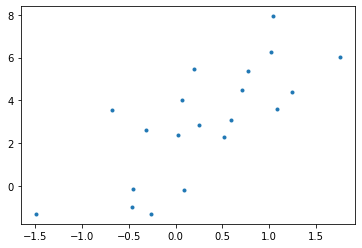

In [5]:
plt.plot(X, Y, ".")

### 1.1 划分训练集和测试集

将20个数据点划分为训练集和测试集，期中训练集为前15个数据点，测试集为后5个。

In [6]:
x_train = X[0:15]
y_train = Y[0:15]
x_test  = X[15:]
y_test  = Y[15:]

In [7]:
def regression(X, Y, n):
    rows = [X**i for i in reversed(range(n))]
    A = np.vstack(rows).T
    theta = np.linalg.solve(A.T@A, A.T@Y)
    return theta

In [8]:
def predict(theta,X):
    n = len(theta)
    degrees = reversed(range(n))

    Y = np.zeros_like(X)
    for w, d in zip(theta, degrees):
        Y += w * X**d
    return Y

### 1.2 数据建模

分别用1到4次多项式函数作为模型拟合训练集中的数据，并分别计算每个模型与数据的均方差（MSE）。

哪一个模型与训练数据拟合最好？

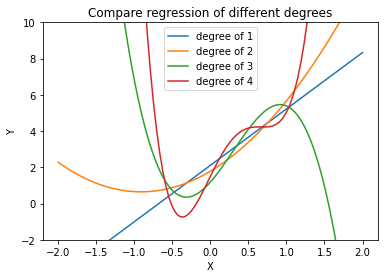

In [9]:
x_model = np.linspace(-2, 2, 100)

for i in range (2,6):
    coef1 = regression(x_train, y_train, i)
    y_model = predict(coef1, x_model)
    plt.plot(x_model, y_model, label="degree of {}".format(i-1))
plt.ylim(-2, 10)
plt.title("Compare regression of different degrees")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

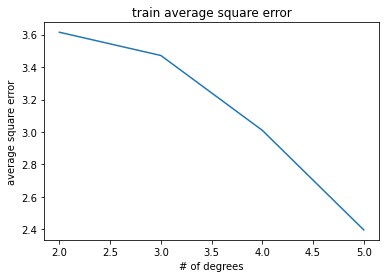

In [10]:
Ss_test = []
Ns_test = []
Ss = []
Ns = []
for n in range(2, 6):#求出1-4次多项式拟合值与实际值的均方差
    theta = regression(x_train, y_train, n)
    Yhat = predict(theta,x_train)
    E = y_train - Yhat
    S = np.dot(E, E) / len(y_train)
    Ss.append(S)
    Ns.append(n)
plt.plot(Ns, Ss, label="train")
plt.title("train average square error")
plt.xlabel("# of degrees")
plt.ylabel("average square error")
plt.show()

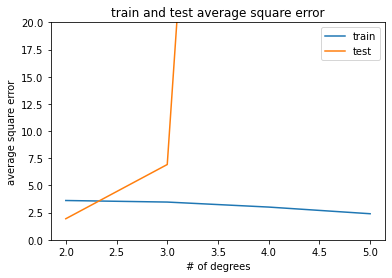

In [11]:
for n in range(2, 6):#求出训练集所拟合的函数对测试集的拟合效果
    theta = regression(x_train, y_train, n)
    Yhat_test = predict(theta,x_test)
    E = y_test - Yhat_test
    S = np.dot(E, E) / len(y_test)
    Ss_test.append(S)
    Ns_test.append(n)
plt.plot(Ns, Ss, label="train")
plt.plot(Ns_test, Ss_test, label="test")
plt.title("train and test average square error")
plt.xlabel("# of degrees")
plt.ylabel("average square error")
plt.legend()
plt.ylim(0, 20)
plt.show()

In [12]:
min_Ss_value = min(Ss)
min_Ss_idx = Ss.index(min_Ss_value)
print("均方差：{}".format(Ss))
print("在1.2问题中，{}次多项式函数与训练数据拟合最好".format(min_Ss_idx+1))

均方差：[3.614119980936591, 3.4709875708912987, 3.010246815533374, 2.3971661654711824]
在1.2问题中，4次多项式函数与训练数据拟合最好


### 1.3 模型测试
计算4个模型与测试数据的均方差，哪一个模型与测试数据拟合最好？

1.2和1.3的答案是否相同？两者的异同有什么意义？

In [13]:
min_Ss_test_value = min(Ss_test)
min_Ss_test_idx = Ss_test.index(min_Ss_test_value)
print("均方差：{}".format(Ss_test))
print("在1.3问题中，{}次多项式函数与训练数据拟合最好".format(min_Ss_test_idx+1))
print("1.2与1.3的答案不相同，1.2里面使用训练集进行测试会出现过拟合现象，故两次测试出的不同才能有效验证模型的有效性")

均方差：[1.9373288022689124, 6.924885916261596, 145.53829178692075, 2717.4997768006206]
在1.3问题中，1次多项式函数与训练数据拟合最好
1.2与1.3的答案不相同，1.2里面使用训练集进行测试会出现过拟合现象，故两次测试出的不同才能有效验证模型的有效性


## 练习2 人工神经网络

有如下神经网络：
- 输入$x$是2维向量，输出$y$是1维标量
- 包含两个全连接层
    - 第一层有5个神经元，激活函数为sigmoid
    - 第二层有1个神经元，激活函数为relu
- 损失函数为均方差MSE

### 2.1 写出公式

- 写出relu、sigmoid函数的公式
- 写出整个神经网络的公式

In [14]:
#relu公式：y = max (0, x)
#sigmoid公式： y = 1/ (1 + e ^(-x))
#神经网络公式：net1=W_1*x+B_1  out1=1/(1 + e ^(-net1))  net2=W_2*out1+B_2     out2=max (0, net2)

### 2.2 正向传播

假设已知4个数据点的输入'X'，参考输出'Y'，参数'W_1'、'B_1'、'W_2'、'B_2'，。

- 正向传播计算输出预测值'Y_pred'
- 计算损失值'L'


In [15]:
import os
import numpy as np
import torch
import torch.nn
from torch import autograd

In [16]:
torch.set_printoptions(precision=8)

In [17]:
X = np.array([[-0.05025071,  1.12345037],
       [-1.2771336 , -0.03387919],
       [-0.06085093,  0.83960333],
       [ 0.26666122, -0.15723225]])

注意，这里输入'x'表示为行向量，即'X'中每行表示一个数据点。

In [18]:
Y = np.array([[ 0.34942997],
       [ 0.09796396],
       [ 1.80617515],
       [-0.50698293]])

In [19]:
W1 = np.random.randn(2,5)
b1 = np.random.randn(5)
W2 = np.random.randn(5,1)
b2 = np.random.randn(1,1)

In [20]:
W1 = np.array([[-0.15772071,  2.4169384 ,  1.18656177,  0.74048303,  0.95473468],
       [ 1.75613621,  0.44768404,  0.25003215,  0.52863169, -0.75204543]])

In [21]:
b1 = np.array([-1.00393578, -0.19942106, -1.23939537,  1.62336519, -0.21580562])

In [22]:
W2 = np.array([[ 0.8173788 ],
       [-0.01165333],
       [ 1.10703394],
       [ 0.90372372],
       [ 0.86510315]])

In [23]:
b2 = np.array([[0.277288]])

In [24]:
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [25]:
X = torch.tensor(X, dtype=torch.float)
Y = torch.tensor(Y, dtype=torch.float)
W1 = torch.tensor(W1, dtype=torch.float, requires_grad=True)
W2 = torch.tensor(W2, dtype=torch.float, requires_grad=True)
b1 = torch.tensor(b1, dtype=torch.float, requires_grad=True)
b2 = torch.tensor(b2, dtype=torch.float, requires_grad=True)


In [26]:
def forward(X,b1,b2,W1,W2):
    Z1 = torch.mm(X, W1) + b1
    h1 = torch.sigmoid(Z1)
    Z2 = torch.mm(h1, W2) + b2
    h2 = torch.relu(Z2)
    return Z1,h1,Z2,h2

In [27]:
Z1,h1,Z2,Y_pred = forward(X,b1,b2,W1,W2)
y_yuce=[]
for i in range (0,4):
    y_yuce.append(Y_pred.tolist()[i][0])
print("预测值‘Y_pred’:{}".format(y_yuce))
loss_fn = torch.nn.MSELoss(reduction='sum')
loss = loss_fn(Y_pred, Y)
loss1 = loss/4
print("损失值‘L’:{}".format(loss1.item()))

预测值‘Y_pred’:[2.1851484775543213, 1.3508155345916748, 2.0996510982513428, 1.9833840131759644]
损失值‘L’:2.806889057159424


### 2.3 方向传播

计算损失值'L'对参数'W_1'、'B_1'、'W_2'、'B_2'的偏导数。

In [28]:
loss.backward()

print("损失值'L'对参数'W_1的偏导数{}'".format(W1.grad))
print("损失值'L'对参数'B_1的偏导数{}'".format(b1.grad))
print("损失值'L'对参数'W_2的偏导数{}'".format(W2.grad))
print("损失值'L'对参数'B_2的偏导数{}'".format(b2.grad))

损失值'L'对参数'W_1的偏导数tensor([[-0.40251270, -0.00182187,  0.04910965, -0.51554191, -0.18737055],
        [ 0.64416027, -0.01111573,  0.81370538,  0.27881461,  0.57317817]])'
损失值'L'对参数'B_1的偏导数tensor([ 1.81363809, -0.02733097,  2.17171216,  1.43887615,  2.10922050])'
损失值'L'对参数'W_2的偏导数tensor([[4.82216787],
        [5.34072685],
        [2.64623547],
        [9.70428658],
        [4.25731277]])'
损失值'L'对参数'B_2的偏导数tensor([[11.74482632]])'
